## Confocal MS2 data Exploration

**Author**: Ciera Martinez (modifications: Samantha Tang)

**Objective**: Reading my MS2 data from the confocal an do exploration of how to scrape nuclei outlines an MS2 spots.

**About Data**: These were taken at and around stage 14 of Drosophila embryo development. The files are in czi.


## Sumary

- Part1a: Read in .czi files
- Part1b: Visualization of image slices and Maximum Projection
- Part 2a: Movie of Z-stack
- Part 2b: Threholdin on zstack

In [115]:
import czifile
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import seaborn as sns


# ## Colors
# from matplotlib import cm
# from colorspacious import cspace_converter
# from collections import OrderedDict

## Set where image is displayed
%matplotlib inline 
# %matplotlib notebook 
#%matplotlib qt 

## Part 1a: Reading in and preparing data 

In [116]:
## Read in example file
array = czifile.imread("../data/2018-10-17/dmel_st14__i_63x-04.czi")

### Checking out the image data

In [117]:
# Check that 'img' is a variable of type 'ndarray' - use Python's built-in function 'type'.
print("Loaded array is of type:", type(array))

# Print the shape of the array
print("Loaded array has shape:", array.shape)

# Check the datatype of the individual numbers in the array. You can use the array attribute 'dtype' to do so.
# Make sure you understand the output!
print("Loaded values are of type:", array.dtype)


Loaded array is of type: <class 'numpy.ndarray'>
Loaded array has shape: (1, 1, 13, 2, 21, 928, 1389, 1)
Loaded values are of type: uint16


Our data type is uint16, which is a 16 bit data type with a range 0 to 65535. Beware! When converting data types, which I migh need to do later, this can cause serious rescaling problems. 

- [Image data and what they mean](http://scikit-image.org/docs/dev/user_guide/data_types.html)


In [118]:
## Use squeeze to get rid of channels my data doesnt have.
array = array.squeeze()

## Essentially these are (time, channel, z-stack, y-axis, and x-axis)
## - [ ] why are there 3 channels? (0,1,2), when I try to see 2, it errors out.
## - [ ] and 13 time points?  I bet is how many times the laser scanned through the stack.
array.shape ## Check

(13, 2, 21, 928, 1389)

### Part 1b: Visualization of image slices and Maximum Projection

By slicing through the array, you can see certain parts of the images. For example below you can see one slice of either channel. So essentially `array[11, 0, 5, ...]` is the 11th time point, MS2 spot channel, 5th slice of the scan. 

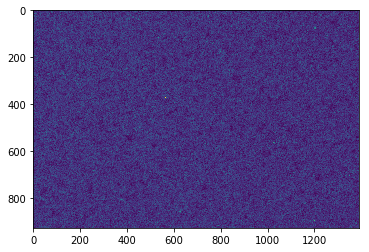

In [119]:
## Accessing and subsetting data
## 0 is MS2 channel
## 1 in chromatin channel

im = array[11, 0, 5, ...] # MS2
# im = array[11, 1, 5, ...] # Chromatin

plt.figure() #visualizing (removed just cuz too many images to scroll thr atm)
plt.imshow(im);

## -[x] why do I need both commands?
## -[] How do I slide through z-stack?

In [120]:
## Using the colon, you can get all slices scanned and make a maximum projection 
zstack = array[11, 0, :, ...] #MS2
zstack_nuc = array[11, 1, :, ...] #nuclei
zstack.shape, zstack_nuc.shape

((21, 928, 1389), (21, 928, 1389))

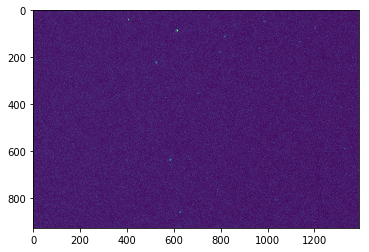

In [121]:
### View Get Maximum projection

IM_MAX= np.max(zstack, axis=0)
plt.imshow(IM_MAX) #removed visualization for now (maximum projection)
plt.show() 

## Part 2a: Movie of Z-stack

- [FuncAnimation documentation](https://matplotlib.org/api/_as_gen/matplotlib.animation.FuncAnimation.html)

### Questions

- What type of z-stack rendering was used? Maximum 
- Can I get both channels to be displayed?
- Why is viridis the default channel?
    - to change color: `im = ax.imshow(zstack[0, :, :], 'nipy_spectral')
    - How do I get to nice confocal color pallettes? 
    - [colormaps guide](https://matplotlib.org/tutorials/colors/colormaps.html)
 

############################################ ADDED BELOW ###########################################################

**GOAL: trace/isolate MS2 dots!**
1. but first, visualize the dots with the nuclei since it's kind of hard to follow which dot is the MS2 dot that we want (lots of noise) 
2. Then, hopefully we can either outline these dots (perhaps segment a slice first to test it out)
    - consult powerpoints/notes? 

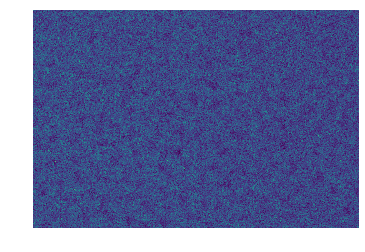

In [122]:
## go through each image in the z-stack

fig, ax = plt.subplots()
ax.axis('off') 
#initial image?
im = ax.imshow(zstack[0, :, :])

def update(i): # setting up the first image
    # Update method - What you want your figure to look like every single time
    im.set_array(zstack[i, :, :]) 
    return [im] #returned as a iterable object as a list.
    # frames is how long, by specifing how many images
    
movie = animation.FuncAnimation(fig, update, interval=200, frames=zstack.shape[0], blit=True)
plt.show()

In [123]:
#Should have both nuc and dot below, but can't really tell? (looks kinda the same as just the nuc movie)

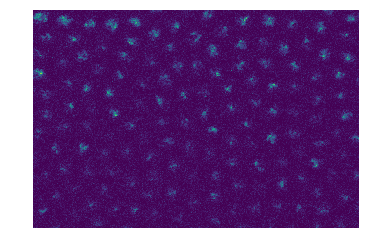

In [124]:
fig, ax = plt.subplots()
ax.axis('off') 
#initial image?
im = ax.imshow(zstack[0, :, :]) #ms2
im2 = ax.imshow(zstack_nuc[0, :, :]) #nuclei

def update2(i): # setting up the first image
    # Update method - What you want your figure to look like every single time
    im.set_array(zstack[i, :, :]) 
    im2.set_array(zstack_nuc[i, :, :])
    return [im, im2] #returned as a iterable object as a list.
    # frames is how long, by specifing how many images
    
movie = animation.FuncAnimation(fig, update2, interval=200, frames=zstack.shape[0], blit=True)
plt.show()

In [125]:
#lots of potential for information/tutorials here: 
#http://scipy-lectures.org/packages/scikit-image/index.html#id29

#TODO: 
#let's just work on one image first before we figure out how to do it for all of them 
#(and them perhaps create a movie for all these segmented images--to visualize)

#and next steps would be to gather information using these segmentations (i.e. diameter of blob, distance, etc.)


In [126]:
#one image (MS2): 

#it's actually really hard to to show all of the the stack scans at once (in larger sizes) to compare
##(time, channel, z-stack, y-axis, and x-axis)

# fig, ax = plt.subplots(7, 3, figsize=(40, 20))

# #21 z stack scans
# row = 0
# col = 0
# for i in range(21):
    
#     if col > 2: 
#         row += 1
#         col = 0
#     img = array[11, 0, i, ...]
#     ax[row, col].imshow(img)
#     col += 1
    
# plt.tight_layout()

# array.shape


<Figure size 1440x720 with 0 Axes>

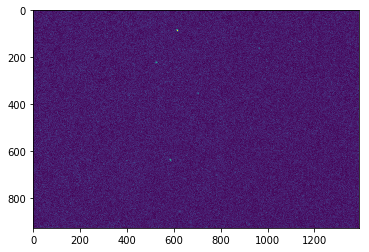

<Figure size 1440x720 with 0 Axes>

In [127]:
ms2_img = array[11, 0, 8, ...] #8th stack scan seems like a good candidate for little noise and clear dots to practice/test on
plt.imshow(ms2_img)
plt.figure(figsize=(20, 10))

#try on this first and try to do the same for the maximum projection of the zstack for ms2 later

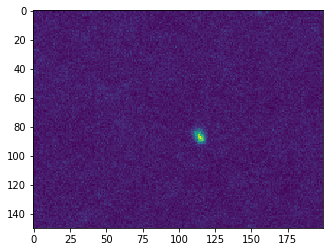

In [128]:
cropped = ms2_img[0:150, 500:700] #cropped image from above
plt.imshow(cropped)

In [167]:
#based off of the segmentation tutorial for coins in scikit image: 
#http://scipy-lectures.org/packages/scikit-image/auto_examples/plot_boundaries.html#sphx-glr-packages-scikit-image-auto-examples-plot-boundaries-py
from skimage import data, segmentation
from skimage import filters
from ipywidgets import interact 


#otsu's method threshold: https://en.wikipedia.org/wiki/Otsu%27s_method
#simply said: the algorithm is suppose to separate foreground with background (separate into two classes, auto)

@interact(threshold = (0, 20000))
def change_threshold(threshold=4000):
    mask = cropped > threshold #filters.threshold_otsu(cropped) #4144 #True false array to mask image
    clean_border = segmentation.clear_border(mask).astype(np.int)
    edges = segmentation.mark_boundaries(cropped, clean_border)

    plt.figure(figsize=(14, 10))
    plt.subplot(121)
    plt.imshow(clean_border, cmap="gray")
    plt.subplot(122)
    plt.imshow(edges)


interactive(children=(IntSlider(value=4000, description='threshold', max=20000), Output()), _dom_classes=('wid…

In [157]:
#and obviously the resulting image is not what I was expecting, does not look like the segmentation of coins/outline
#so will test out thresholds and other methods
 
    
#0 pixel is black, 255 is white
array.shape

(13, 2, 21, 928, 1389)

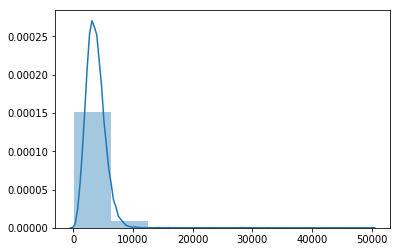

In [151]:
sns.distplot(cropped.ravel(), bins = 8,  kde=True); #.ravel flattens 3d array into 1d to plot histogram

In [ ]:
#SUMMARY: 
#so turns out using otsu gave a 4000 threshold, but that didn't work very well 
#(too low of a number so the noise was captured as well)
#created a histogram to figure out where the maximum threshold might be 
#(highest number required so that, we capture the dot outline only and not noise 
#(turns out that there is a bin/pixel around 10000--see image histogram))
#so created an interactive thresholding function to test this out (see above)
# and indeed, we did see that anything around 100000 give an outline of dot above! yay!

Now, let's try this on the uncropped image and see if we can still locate the dots.

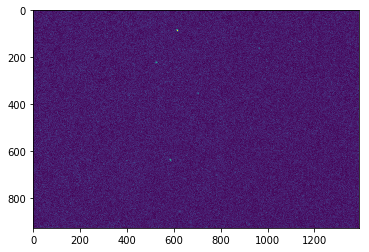

In [169]:
plt.imshow(ms2_img)

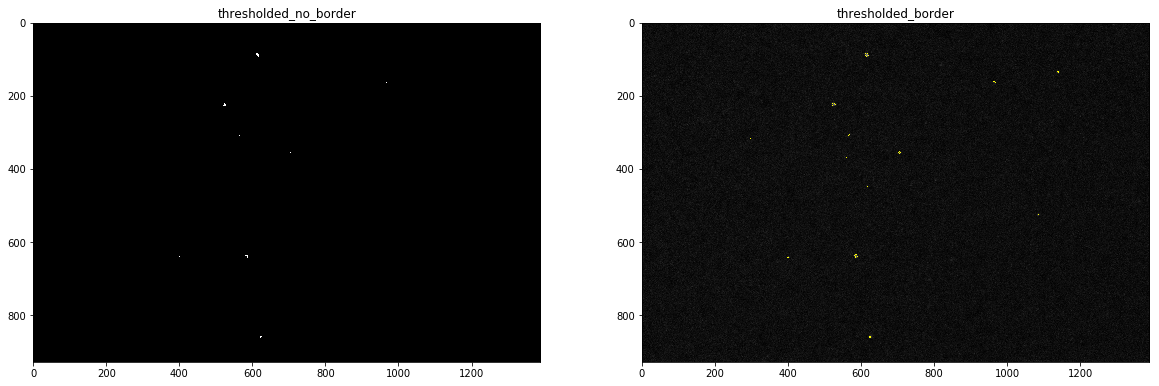

In [176]:
mask = ms2_img > 15000 #filters.threshold_otsu(cropped) #4144 #True false array to mask image
clean_border = segmentation.clear_border(mask).astype(np.int)
edges = segmentation.mark_boundaries(ms2_img, clean_border)

plt.figure(figsize=(20, 14))
plt.subplot(121)
plt.imshow(clean_border, cmap="gray")
plt.title("thresholded_no_border")
plt.subplot(122)
plt.imshow(edges)
plt.title("thresholded_border");

In [ ]:
#enlarged below for comparison

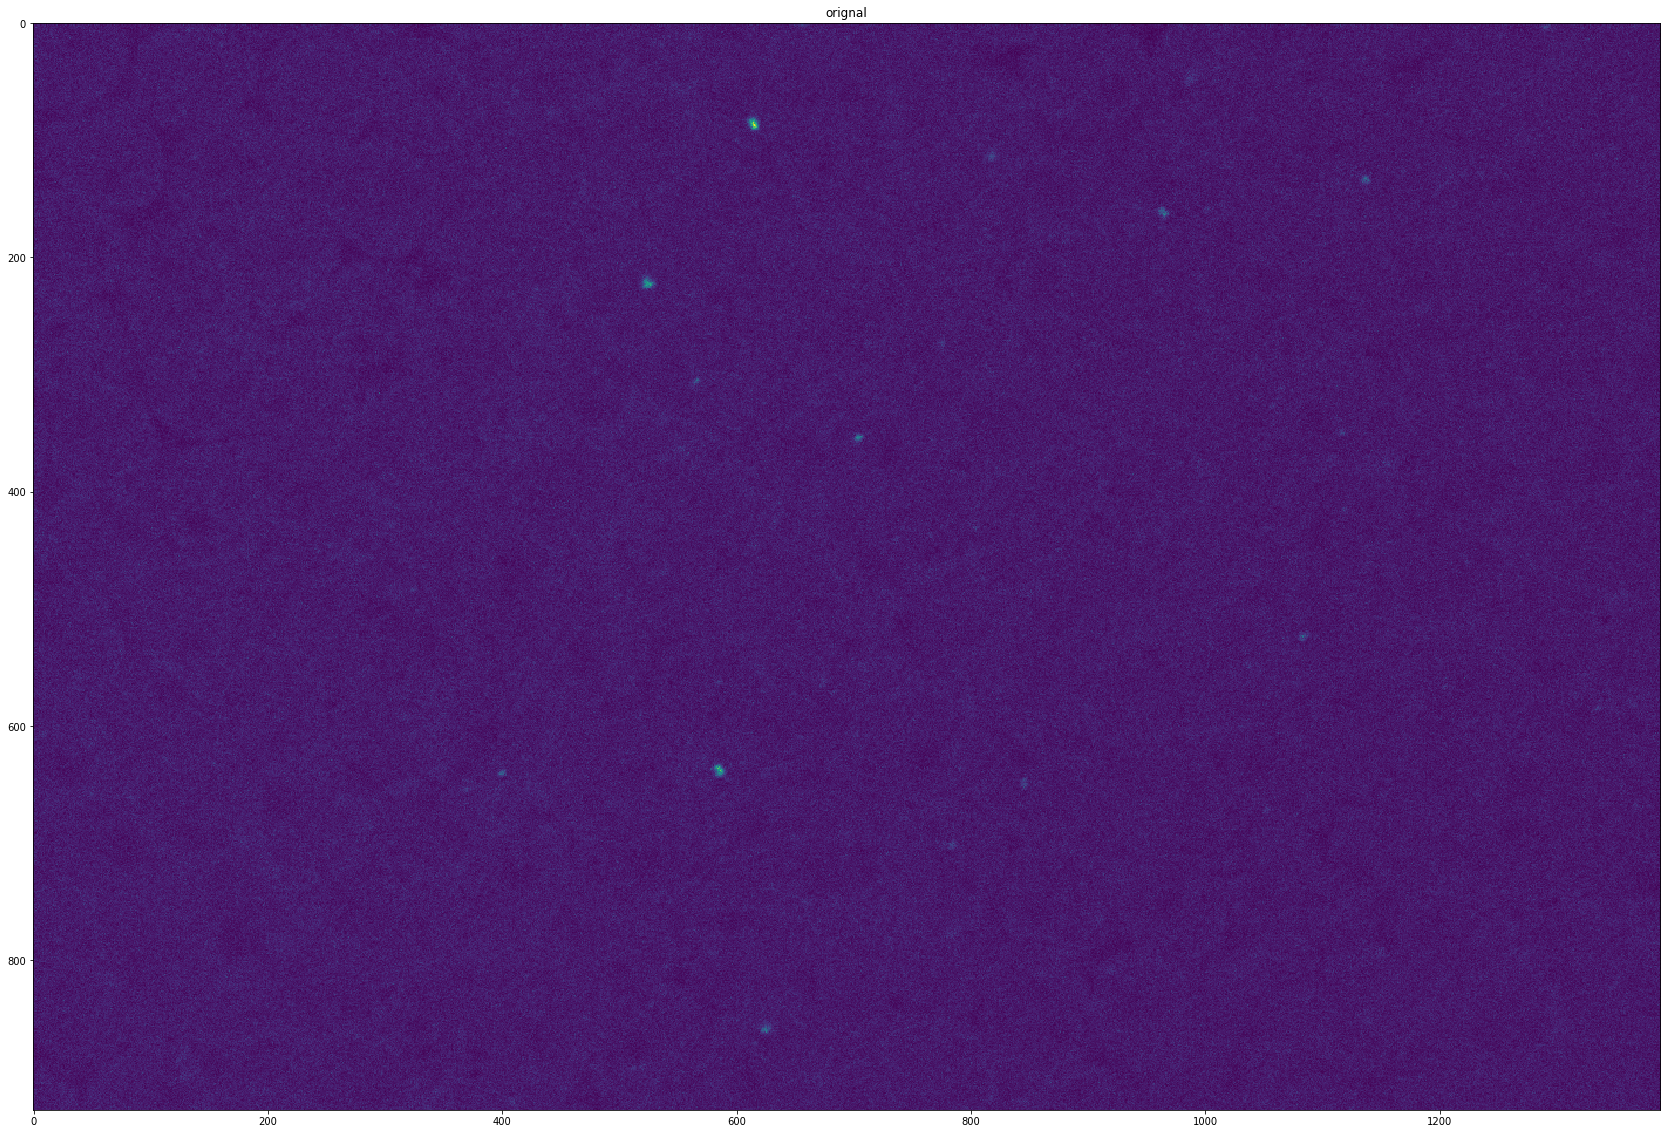

In [180]:
plt.figure(figsize=(40, 20))
plt.imshow(ms2_img)
plt.title("orignal");

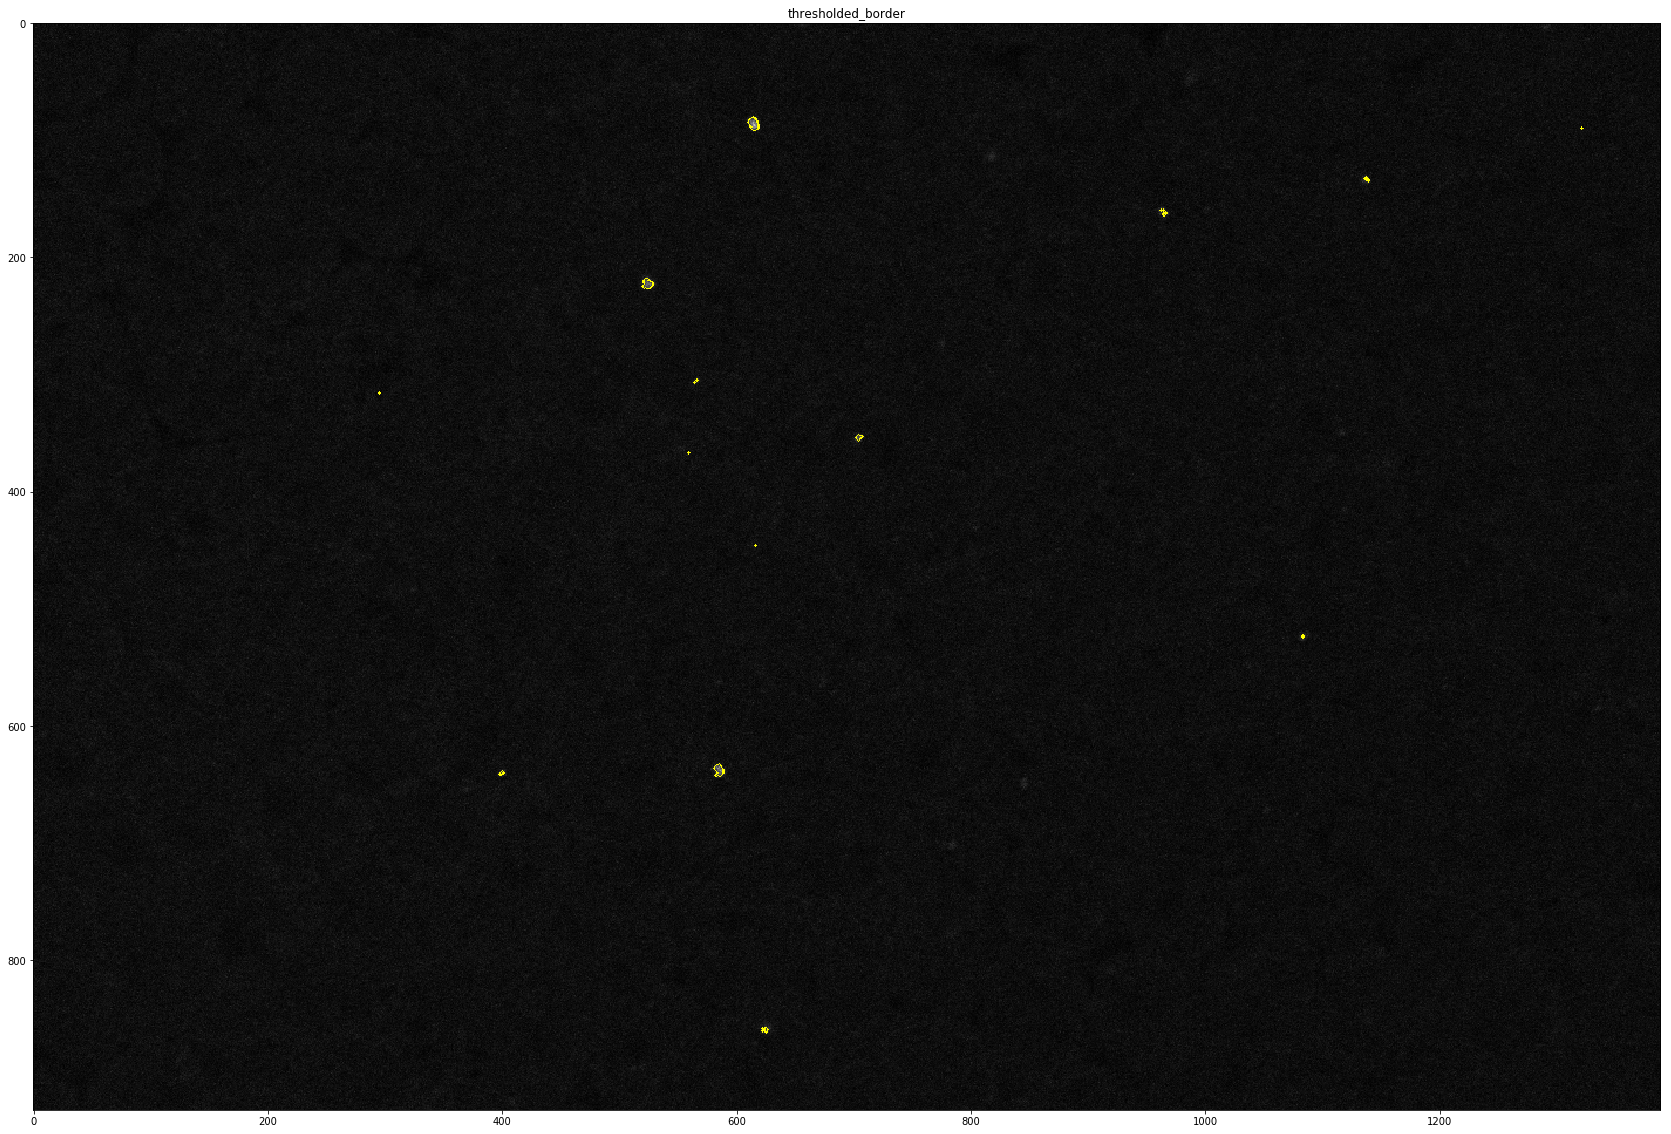

In [181]:
plt.figure(figsize=(40, 20))
plt.imshow(edges)
plt.title("thresholded_border");

In [183]:
#COMMENTS/QUESTIONS/ISSUES
#i would say it does a pretty good job in capture the dots (even the more faded dots as they disappear)
#of course now we need to figure out how to capture/locate the same dots as they appear and disappear
#maybe mark them somehow (according to pixel location? but the dots will move, or associate them with the nuclei?)
# also need to figure out how to keep/modify/change threshold for each image
#since each threshold image will have different thresholds (depending on how faded the dots are)
#so need to be able to capture the same amount of dots each time (even when fading or reappearing or new dot)

## Setting a color threshold 

This is so I can take the noise away and see onl the MS2 dots.

- [Tutorial](https://matplotlib.org/users/image_tutorial.html)
- [Colors](https://matplotlib.org/tutorials/colors/colormaps.html)


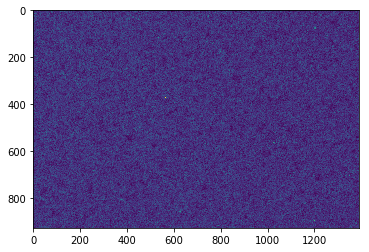

In [87]:
lum_img = array[11, 0, 5, ...]

plt.figure() # Set the stage
# This is array slicing.  You can read more in the `Numpy tutorial
# <https://docs.scipy.org/doc/numpy/user/quickstart.html>`_.

# To change color
#plt.imshow(lum_img, cmap='Greens') 

plt.imshow(lum_img) # makes the graph
plt.show() #displays the graph
# plt.colorbar() #deal with this later

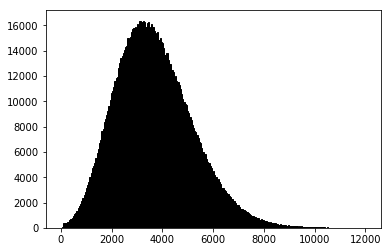

In [58]:
lum_img = array[11, 0, 5, ...]

plt.figure()
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 12000), fc='k', ec='k');

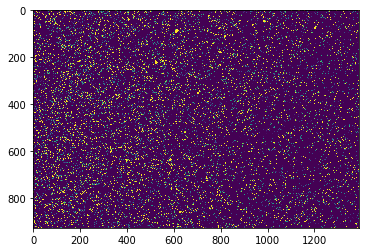

In [57]:
## Zoom in to tail of histogram
plt.figure()
imgplot = plt.imshow(lum_img, clim=(7900, 9000));

## This is good, but likely needs to be done on the maximum projection

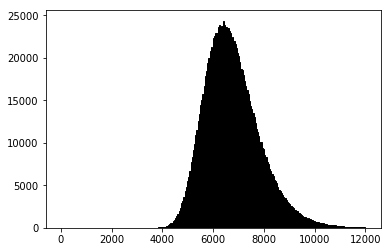

In [55]:
## access one slice of the frame
zstack = array[11, 0, :, ...]
zstack.shape
zstack
IM_MAX= np.max(zstack, axis=0)
lum_img = IM_MAX

## The threshold graph is done on the upper limit of this graph
plt.figure()
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 12000), fc='k', ec='k');

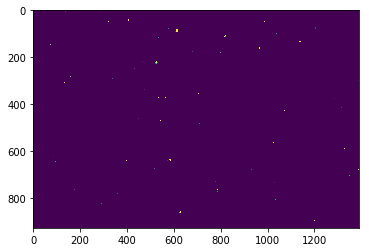

In [54]:
## Zoom in to tail of histogram
plt.figure()
imgplot = plt.imshow(lum_img, clim=(12200, 14000))

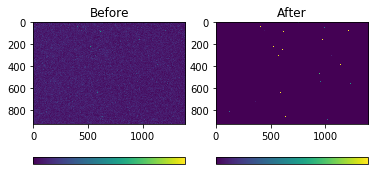

In [53]:
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(lum_img)
a.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(lum_img)
imgplot.set_clim(12200, 14000)
a.set_title('After')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal');

## Next Steps

The thresholding appears to be working pretty well to identify the MS2 spots, but there is def improvement to occur.

- [ ] Try out blob detecion

In [ ]:
## Resources

- [Scipy](https://docs.scipy.org/doc/scipy/reference/ndimage.html)
- [Scikit image](https://scikit-image.org/)
